#Chapter9

x1의 최솟값과 최댓값: 0.0051104914668353985 9.997926702130965
e의 평균: 0.0 e의 분산: 0.48969472118522855


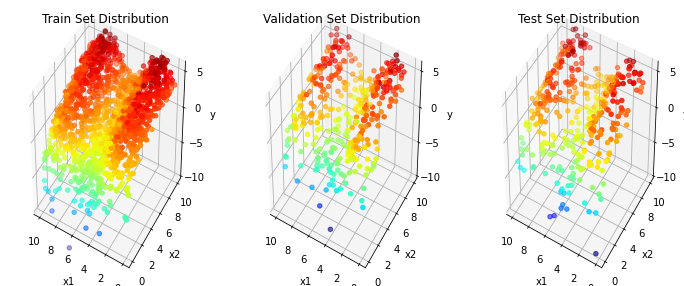

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

num_data = 2400 #데이터의 수는 2400개
x1 = np.random.rand(num_data) * 10 #x1은 *10을 함으로써 0부터 10까지의 랜덤 숫자를 총 2400개를 균일하게 생성한다. 
print("x1의 최솟값과 최댓값:",x1.min(), x1.max())

x2 = np.random.rand(num_data) * 10 #np.random.rand(데이터의 갯수) * 크기 (크기 설정 안하면 0부터 1까지 균등한 분포)

e = np.random.normal(0, 0.5, num_data) #잡음은 가우시안 분포(정규분포)를 이용하여 평균은 0, 표준편자는 0.5인 난수 생성
print("e의 평균:",np.round(e.mean()), "e의 분산:", e.std())


X = np.array([x1, x2]).T #x1과 x2를 눕히고 싶어서 2*2400에서 2400*2가 된다. 
y = 2*np.sin(x1) + np.log(0.5 * x2 **2) + e
#훈련, 검증 데이터를 나누기
train_X, train_y = X[:1600, :], y[:1600] #2400*2인데 [:1600, :]는 x1과 x2가 쌍으로 1600개까지 train_data
val_X, val_y = X[1600:2000, :], y[1600: 2000] #1600qnxj 2000은 validation
test_X, test_y = X[2000:, :], y[2000:] 

#그래프 시각화
#그래프를 그리는 방법: 1. plt.plot(그래프를 1개 그릴 때)
#2.여러개를 그리고 싶으면 fig를 지정 fig = plt.subplot(figsize = (, ))
#3. subplot은 figure에 들어가는 작은 그림이다. add_subplot(1, 3, 1), add_subplot(1, 3, 2), add_subplot(1, 3, 3)
#subplot을 행은 1개 열은 총 3개 그리기 projection = '3d' 3d를 그리기
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection = '3d')
ax1.scatter(train_X[:,0], train_X[:,1], train_y, c=train_y, cmap = 'jet')#X[0]은 x1. X[1]은 x2이다.

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')

ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()


In [ ]:

class MLPModel(nn.Module):
  def __init__(self):
    super(MLPModel, self).__init__()
    self.linear1 = nn.Linear(2, 200)   #입력 모델을 200점으로 확장
    self.linear2 = nn.Linear(200, 1)   #1의 출력을 형성
    self.relu = nn.ReLU() #비선형 함수
                                                        
  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    return x


In [ ]:
import torch
import torch.nn as nn

class MLPModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(MLPModel, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.linear2 = nn. Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x) 
    return x

model = MLPModel(2, 200, 1)

In [ ]:
reg_loss = nn.MSELoss()

predicted = torch.Tensor([0, 0, 0, 0])
labels = torch.Tensor([1, 0, 0, 0])
print(reg_loss(predicted, labels))
#기준 변수를 설정 
#기준(예측값, 정답값)에서 오차가 나온다. 

tensor(0.2500)


In [ ]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

lr = 0.005

optimizer = optim.SGD(model.parameters(), lr = lr) #learning_rate를 설정

#epoch는 주어진 데이터를 몇번 보여줄지 결정
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000 #iteration과 헷갈릴 수 있음 iteration은 파라미터가 한번 업데이트 되는 횟수.
#iteration은 10만개의 데이터를 한번에 training을 할 수 없어서 100개의 배치로 나눠서 훈련을 시킨다.
#이걸로 gradient구하고 iteration을 한다. 
#ieration은 batch_size마다 발생, epoch는 데이터의 전체를 보고 업데이트한다. 
#배치와 미니배치는 차이가 거의 없다.

#===============학습================
for i in range(epoch):
  model.train() #이걸 해줘야 training을 한다. evaluation일 때는 model.eval()을 사용 모드를 결정
  optimizer.zero_grad() #연산 그래프를 초가화 안그러면 연산이 누적되어서 발산 

  input_x = torch.Tensor(train_X)  #np.array, torch.Tensor()
  true_y = torch.Tensor(train_y)   #파이토치로 연산하려면 무조건 입력데이터 텐서로 바꾸기
  pred_y = model(input_x) #model에 input_x를넣으면 된다. 이때 결과값의 형태가 (1600, 1)이다! 엥 true_y는 (1600,)인데?
  loss = reg_loss(pred_y.squeeze(), true_y) #이래서 예측값에서 pred_y.squeeze()를 통해 불필요한 1인 차원을 없앤다.
  loss.backward()    #.squeeze()안하면 학습이 안될 수 있다!! 그리고 gradient알아서 계산한다. 
  optimizer.step()  
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy()) #loss값에서 gradient값을 신경 안쓰고 loss라는 순수한 숫자를 원할때 사용
  #loss.item()사용해도 된다.!!!!!

#===============검증================
  model.eval()
  optimizer.zero_grad()
  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y)
  pred_y = model(input_x)
  loss = reg_loss(pred_y.squeeze(), true_y)
  list_val_loss.append(loss.item())

#=============시험=============
  if i % 200 == 0: #200회의 학습마다 모델이 예측한 분포 그리기
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(test_X)
    true_y = torch.Tensor(test_y)
    pred_y = model(input_x).detach().numpy()
    mae = mean_absolute_error(true_y, pred_y)
    list_mae.append(mae)
    list_mae_epoch.append(i)

    #그림그리기 
    #test_dataset그리기
    fig = plt.figure(figsize = (15, 5))
    ax1 = fig.add_subplot(1, 3, 1, projection = '3d')
    ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c = test_y, cmap = 'jet')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    
    ax1.set_zlim(-10, 6)
    ax1.view_init(40, -40)
    ax1.set_title('True test y')
    ax1.invert_xaxis()

    #예측 그리기

    ax2 = fig.add_subplot(1, 3, 2, projection = '3d')
    ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y,  c=pred_y[:,0], cmap='jet')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_zlim(-10, 6)
    ax2.view_init(40, -40)
    ax2.set_title('Predicted test y')
    ax2.invert_xaxis()

    input_x = torch.Tensor(train_X)
    pred_y = model(input_x).detach().numpy() 
    pred_y = pred_y.squeeze()
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y, cmap='jet')

    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('y')
    ax3.set_zlim(-10, 6)
    ax3.view_init(40, -40)
    ax3.set_title('Predicted train y')
    ax3.invert_xaxis()
        
    plt.show()
    print(i, loss)



Output hidden; open in https://colab.research.google.com to view.

#MNIST

In [ ]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn

batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

50000 10000 10000


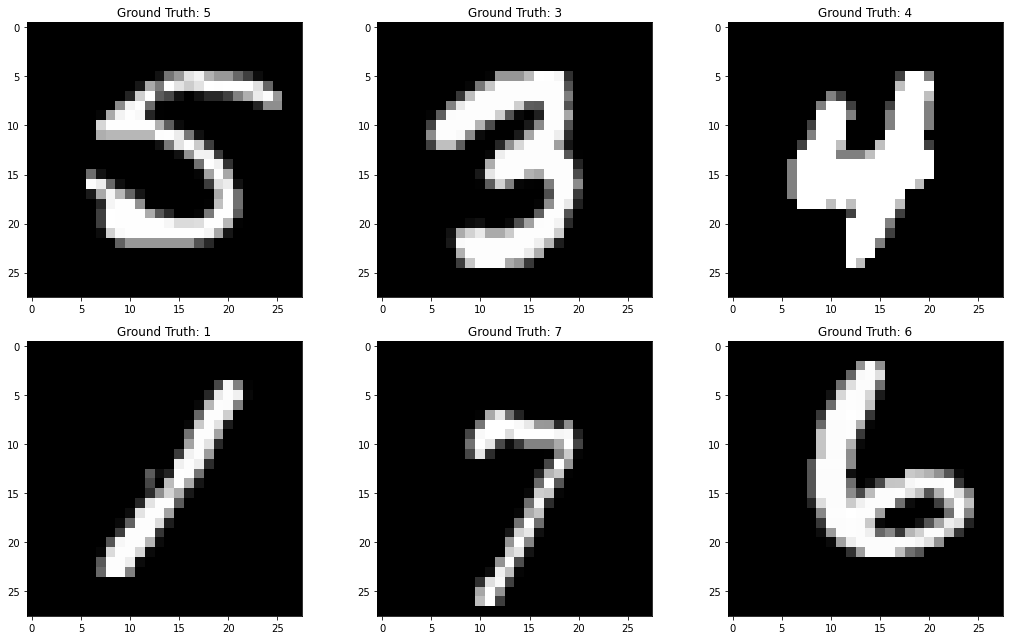

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)  

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

In [ ]:
class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=784, out_features=10, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
class Mymodel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(Mymodel, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.linear2 = nn.Linear(hidden_dim, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.linear1(x)
    x = self.linear2(x)
    return x

model = Mymodel(784, 128, 10)

criterion = nn.CrossEntropyLoss()


    

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    # ====== Train ====== #
    train_loss = 0
    model.train() 
    
    for input_X, true_y in train_loader:
        optimizer.zero_grad() # [21.01.05 오류 수정] 매 Epoch 마다 .zero_grad()가 실행되는 것을 매 iteration 마다 실행되도록 수정했습니다. 

        input_X = input_X.squeeze() #주의해야 함. 왜냐면 input_X 타입을 출력해보면 1이 있어서 1을 없애려고 squeeze
        input_X = input_X.view(-1, 784) #주의해야 함. 28*28을 784로 바꿈
        pred_y = model(input_X)

        loss = criterion(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    # ====== Validation ====== #
    val_loss = 0
    model.eval()
    # optimizer.zero_grad() [21.01.05 코드 클린업] 아래 torch.no_grad()가 호출되고 Validation 과정에서는 Optimizer를 사용하지 않으므로 굳이 호출될 필요가 없습니다. 
    
    with torch.no_grad(): # [21.01.05 코드 클린업] Validation 과정에서 그라디언트가 활용되지 않도록 torch.no_grad() statement 안에서 코드를 실행합니다.
        for input_X, true_y in val_loader:
            input_X = input_X.squeeze()
            input_X = input_X.view(-1, 784)
            pred_y = model(input_X)

            loss = criterion(pred_y.squeeze(), true_y)
            val_loss += loss.detach().numpy()
        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)


    # ====== Evaluation ======= #
    correct = 0
    model.eval()
    # optimizer.zero_grad() [21.01.05 코드 클린업] 아래 torch.no_grad()가 호출되고 Evaluation 과정에서는 Optimizer를 사용하지 않으므로 굳이 호출될 필요가 없습니다. 

    with torch.no_grad(): # [21.01.05 코드 클린업] Evaluation 과정에서 그라디언트가 활용되지 않도록 torch.no_grad() statement 안에서 코드를 실행합니다.
        for input_X, true_y in test_loader:
            input_X = input_X.squeeze()
            input_X = input_X.view(-1, 784)
            pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
            correct += pred_y.eq(true_y).sum()

        acc = correct.numpy() / len(test_loader.dataset)
        list_acc.append(acc)
        list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))


Number of 101770 parameters
Epoch: 0, Train Loss: 0.4742060934796053, Val Loss: 0.42162771089167533, Test Acc: 89.13%
Epoch: 1, Train Loss: 0.40129620545660444, Val Loss: 0.37767465525790106, Test Acc: 90.0%
Epoch: 2, Train Loss: 0.3696417299759053, Val Loss: 0.3549186919308916, Test Acc: 90.36%
Epoch: 3, Train Loss: 0.35112796247462785, Val Loss: 0.3403022228916989, Test Acc: 90.63%
Epoch: 4, Train Loss: 0.3383931526747506, Val Loss: 0.3299429335548908, Test Acc: 90.99000000000001%
Epoch: 5, Train Loss: 0.3290750771532278, Val Loss: 0.32186387903705427, Test Acc: 91.19%
Epoch: 6, Train Loss: 0.3218839832812624, Val Loss: 0.3162429261056683, Test Acc: 91.24%
Epoch: 7, Train Loss: 0.3161599458483479, Val Loss: 0.311367774783056, Test Acc: 91.46%
Epoch: 8, Train Loss: 0.3110186985081724, Val Loss: 0.30846244323102734, Test Acc: 91.5%
Epoch: 9, Train Loss: 0.30698588494297185, Val Loss: 0.30412124795249745, Test Acc: 91.58%
Epoch: 10, Train Loss: 0.30351035373137736, Val Loss: 0.302283555

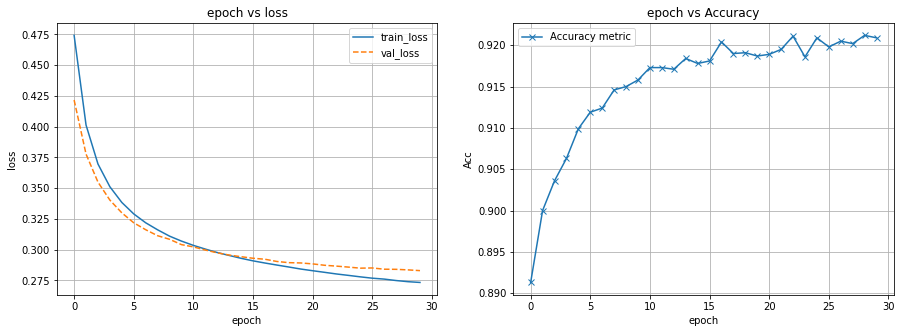

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()